In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\gohch\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Load the data from the JSON file
with open('data/rescaled_dengue fever.json', 'r') as f:
    data = json.load(f)

# Initialize an empty list to store the reformatted data
formatted_data = []

# Loop through each year and the data for that year
for year, year_data in data:
    # Convert the year data into a Pandas DataFrame
    dengue_fever = pd.DataFrame.from_dict(year_data, orient='index')#, columns=['value'])
    dengue_fever.index.name = 'date'
    dengue_fever.reset_index(inplace=True)
    dengue_fever['date'] = pd.to_datetime(dengue_fever['date'])
    dengue_fever['year'] = year
    formatted_data.append(dengue_fever)

# Concatenate all of the year data into a single DataFrame
dengue_fever = pd.concat(formatted_data)

# Group the data by date and year, and calculate the mean value for each group
dengue_fever = dengue_fever.groupby(['date', 'year']).mean().reset_index()

dengue_fever.groupby('year').describe()

0                                                             \
     count        mean         std        min         25%         50%   
year                                                                    
2012  53.0   73.043905   30.081699   0.000000   55.960620   77.483935   
2013  54.0  196.202010  135.541938  73.405833  122.343055  154.967870   
2014  55.0  101.977261   53.866005   0.000000   65.249629   89.718240   
2015  55.0   80.091673   30.826273  16.806723   58.823529   75.630252   
2016  54.0   85.457516   55.289525   0.000000   48.529412   77.205882   
2017  54.0   43.685185   20.630463   0.000000   34.000000   43.000000   
2018  54.0   39.921569   19.047310   0.000000   27.529412   36.529412   
2019  54.0   90.022150   42.168098  24.235294   58.568627   80.784314   
2020  55.0   81.049223   45.527342   0.000000   50.634454   71.263305   

                              
             75%         max  
year                          
2012   90.397924  143.488768  
2013  199.826990  815.620366  
2014  120.983688  271.873455  
2015   98.319328  168.067227  
2016  123.529412  220.588235  
2017   53.750000  100.000000  
2018   51.352941  105.882353  
2019  104.514706  201.960784  
2020  108.770308  187.535014

In [4]:
# Create a line plot of the data
sns.lineplot(x='date', y='value', hue='year', data=dengue_fever)

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Google Trends Index')
plt.title('Rescaled Google Trends Results for "Wolbachia"')
plt.show()

AttributeError: module 'seaborn' has no attribute 'lineplot'

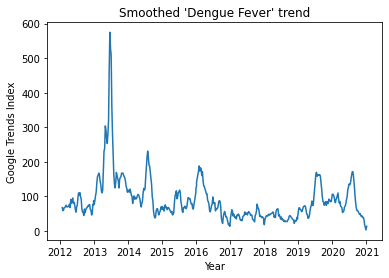

In [ ]:
# Plot smoothed data using 4-week window
dengue_fever['smoothed'] = dengue_fever['value'].rolling(window=4).mean()
plt.plot(dengue_fever['date'], dengue_fever['smoothed'])
plt.title("Smoothed 'Dengue Fever' trend")
plt.xlabel('Year')
plt.ylabel('Google Trends Index')
plt.show()

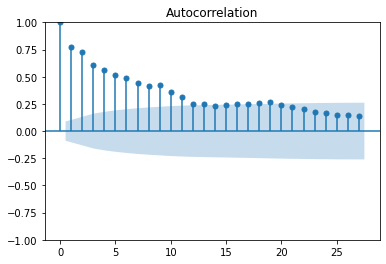

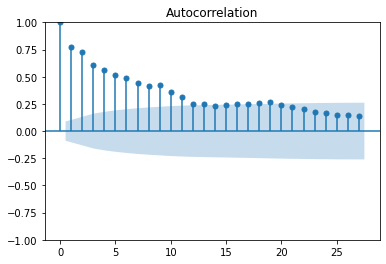

In [ ]:
plot_acf(dengue_fever['value'])

C:\Users\peh_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


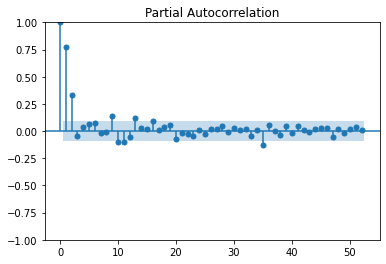

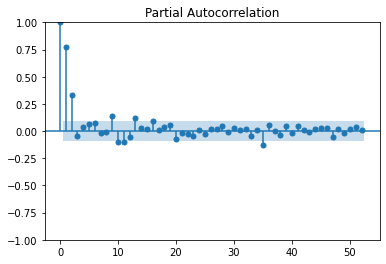

In [ ]:
plot_pacf(dengue_fever['value'], lags=52)

In [ ]:
# Load the data from the JSON file
with open('rescaled_wolbachia.json', 'r') as f:
    data = json.load(f)

# Initialize an empty list to store the reformatted data
formatted_data = []

# Loop through each year and the data for that year
for year, year_data in data:
    # Convert the year data into a Pandas DataFrame
    wolbachia = pd.DataFrame.from_dict(year_data, orient='index', columns=['value'])
    wolbachia.index.name = 'date'
    wolbachia.reset_index(inplace=True)
    wolbachia['date'] = pd.to_datetime(wolbachia['date'])
    wolbachia['year'] = year
    formatted_data.append(wolbachia)

# Concatenate all of the year data into a single DataFrame
wolbachia = pd.concat(formatted_data)

# Group the data by date and year, and calculate the mean value for each group
wolbachia = wolbachia.groupby(['date', 'year']).mean().reset_index()

wolbachia.groupby('year').describe()

value                                                            
     count       mean        std  min  25%  50%        75%         max
year                                                                  
2012  53.0  11.245283  22.386385  0.0  0.0  0.0   0.000000  100.000000
2013  54.0   8.685185  20.949016  0.0  0.0  0.0   0.000000  100.000000
2014  55.0  12.971588  22.337375  0.0  0.0  0.0  23.068558  112.529551
2015  55.0   7.378723  16.849781  0.0  0.0  0.0   0.000000   72.340426
2016  54.0  11.129630  21.496859  0.0  0.0  0.0  15.000000  100.000000
2017  54.0  14.092593  27.627761  0.0  0.0  0.0   0.000000  100.000000
2018  54.0  12.574074  27.787334  0.0  0.0  0.0   0.000000  100.000000
2019  54.0  15.944444  26.670185  0.0  0.0  0.0  29.750000  100.000000
2020  55.0  16.054545  23.679510  0.0  0.0  0.0  24.500000  100.000000

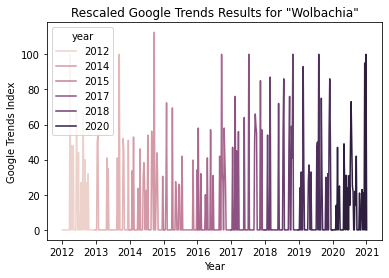

In [ ]:
# Create a line plot of the data
sns.lineplot(x='date', y='value', hue='year', data=wolbachia)

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Google Trends Index')
plt.title('Rescaled Google Trends Results for "Wolbachia"')
plt.show()

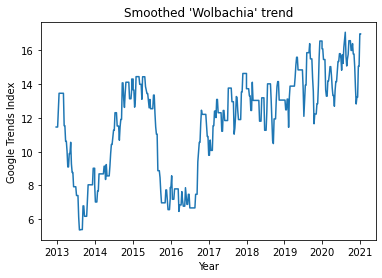

In [ ]:
# Plot smoothed data using 52-week window
wolbachia['smoothed'] =wolbachia['value'].rolling(window=52).mean()
plt.plot(wolbachia['date'],wolbachia['smoothed'])
plt.title("Smoothed 'Wolbachia' trend")
plt.xlabel('Year')
plt.ylabel('Google Trends Index')
plt.show()

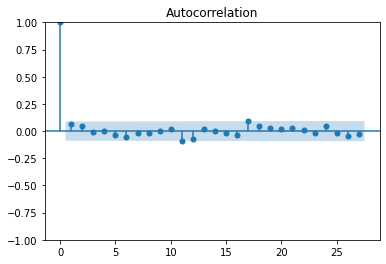

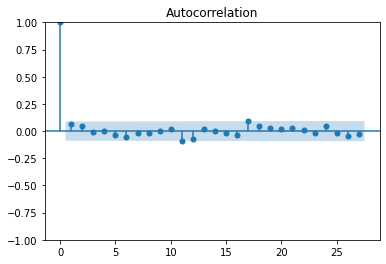

In [ ]:
plot_acf(wolbachia['value'])

C:\Users\peh_s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


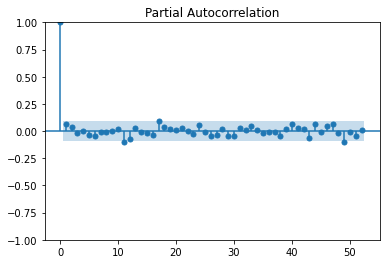

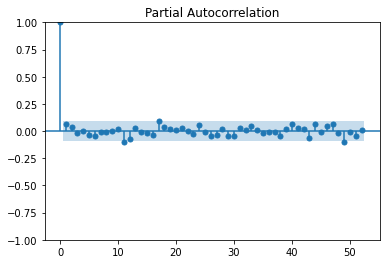

In [ ]:
plot_pacf(wolbachia['value'], lags=52)